In [1]:
import os
from utilities import *
from perceptron import *
from sklearn.datasets import make_blobs
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from NN_2_layers import *


In [2]:
print(os.listdir())

['.git', '.ipynb_checkpoints', 'datasets', 'main.ipynb', 'perceptron.py', 'utilities.py', '__pycache__']


In [11]:
# telecharger nos donnée
X_train, y_train, X_test, y_test = load_data()

In [12]:
# check data shapes
print(
    f'X_train shape = {X_train.shape} \nX_test shape = {X_test.shape} \ny_train = {y_train.shape} \ny_test = {y_test.shape}'
)

X_train shape = (1000, 64, 64) 
X_test shape = (200, 64, 64) 
y_train = (1000, 1) 
y_test = (200, 1)


In [13]:
# how much classes do we have
print(np.unique(y_train, return_counts=True))

(array([0., 1.]), array([500, 500], dtype=int64))


c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


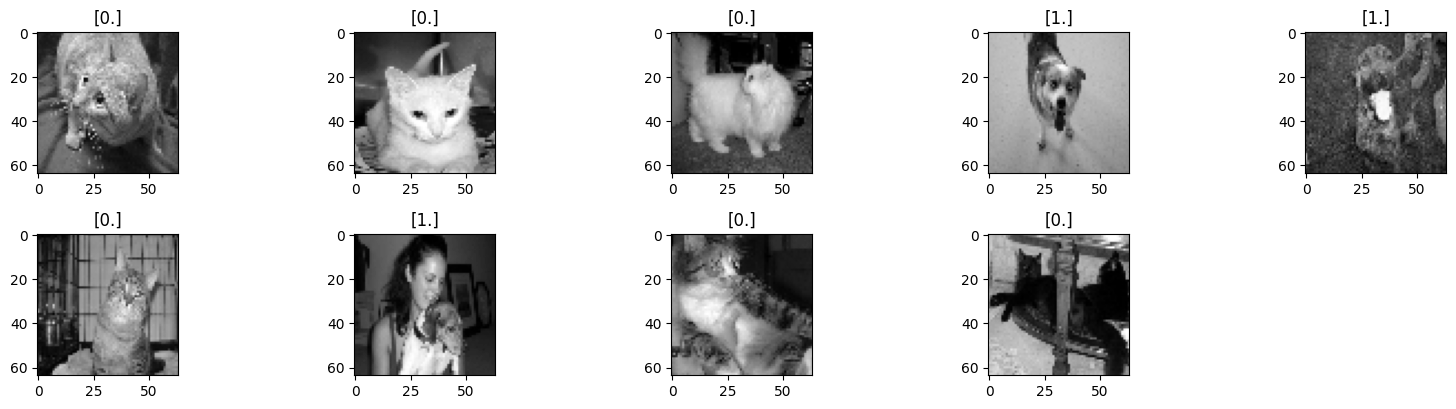

In [14]:
# display first 10 pictures
plt.figure(figsize=(16, 8))
for i in range(1, 10):
  plt.subplot(4, 5, i)
  plt.imshow(X_train[i], cmap='gray')
  plt.title(y_train[i])
  plt.tight_layout()
plt.show()

#TODO
- NORMALISATION 0-1
- FLATTEN
- ENTRAINNEMENT ++> COURBE D'APP  / TROUVER LES BONS HYPERPARAMS
- EVALUER LE MODEL SUR LE TESTSET

# Make our NEURON model from scratch

# First, let's test our neuron on random data with only two variables

La frontière de décision est l’ensemble des points pour lesquels z = 0. C’est aussi l’endroit pour lesquels les proba sont égale à 50%.
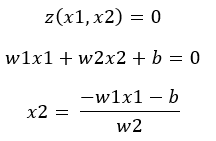

dimensions de X: (100, 2)
dimensions de y: (100, 1)


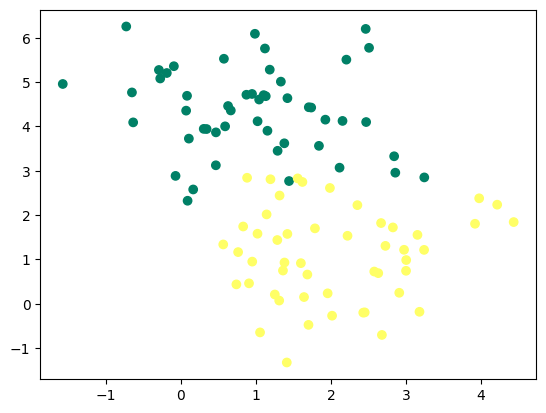

0.9


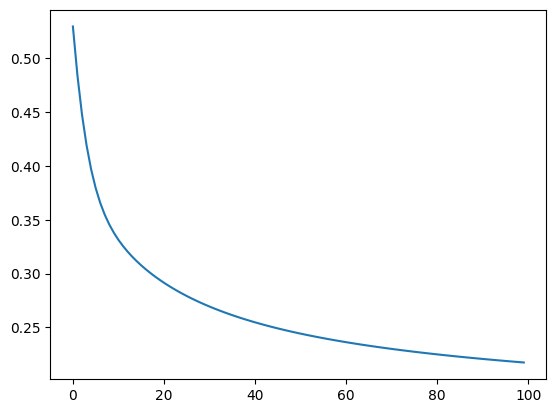

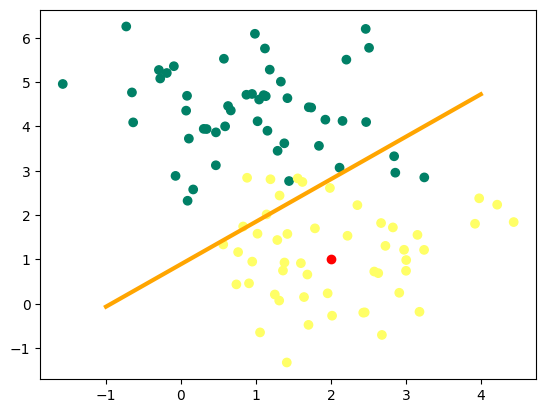

array([ True])

In [6]:

X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()


# courbe d'apprentissage : fonction cout
W, b = artificial_neuron_v1(X, y)

# INDEP DATA
# new plant
new_plant = np.array([2, 1])

x1 = np.linspace(-1, 4, 100)
x2 = ( - W[0] * x1 - b) / W[1]

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.plot(x1, x2, c='orange', lw=3)

plt.show()
predict(new_plant, W, b)

# plot in 3 D our logistic model

In [7]:
fig = go.Figure(data=[go.Scatter3d(
    x=X[:, 0].flatten(),
    y=X[:, 1].flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(),
        colorscale='YlGn',
        opacity=0.8,
        reversescale=True
    )
)])

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

In [8]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = W[0] * xx0 + W[1] * xx1 + b
A = 1 / (1 + np.exp(-Z))

fig = (go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='YlGn', opacity = 0.7, reversescale=True)]))

fig.add_scatter3d(x=X[:, 0].flatten(), y=X[:, 1].flatten(), z=y.flatten(), mode='markers', marker=dict(size=5, color=y.flatten(), colorscale='YlGn', opacity = 0.9, reversescale=True))


fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

# Now w'll work on our cat dog dataset

### Reshape (or flattening) and normalize our data

In [15]:
#RESHAPE + NORMALISATION MIN MAX
# IL FAUT TJRS NORMALISER LES DONN2ES AVANT D4UTILISER LA DESCENTE DU GRADIENT
# LA FONCTION COUT DEVIENT COMPRESSER QUAND L'ECHEL DES VARIABLES EST TRES DIFFERENTE
X_train_reshape = X_train.reshape(X_train.shape[0],-1) / X_train.max()
print(X_train_reshape.shape)
X_test_reshape = X_test.reshape(X_test.shape[0],-1) / X_train.max()
print(X_test_reshape.shape)

(1000, 4096)
(200, 4096)


In [10]:
print(
  X_test_reshape.min(),
  X_test_reshape.max()
)

0.0 1.0


100%|██████████| 100/100 [00:00<00:00, 482.06it/s]


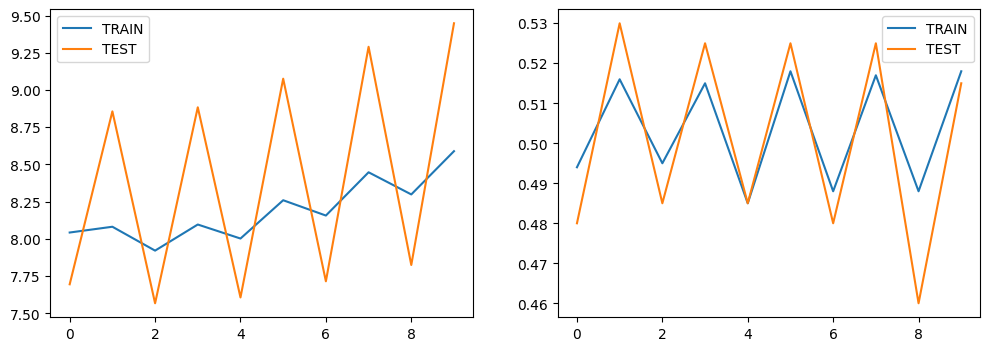

In [11]:
W, b = artificial_neuron(X_train_reshape, y_train, X_test_reshape, y_test)
#cette ossillation est lier au learning rate qui est trop important (0.1) par rapport a une vrai classification d'image comme ici

100%|██████████| 100/100 [00:00<00:00, 441.71it/s]


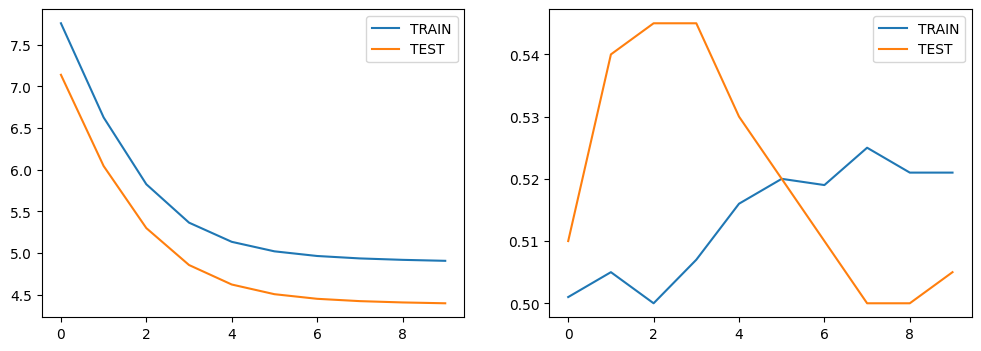

In [12]:
W, b = artificial_neuron(X_train_reshape, y_train, X_test_reshape, y_test, learning_rate=0.01)
# maintenant pas d'ossillation, mais on peut modifier le nom d'itaration pour que le model apprenne plus

100%|██████████| 1000/1000 [00:02<00:00, 483.53it/s]


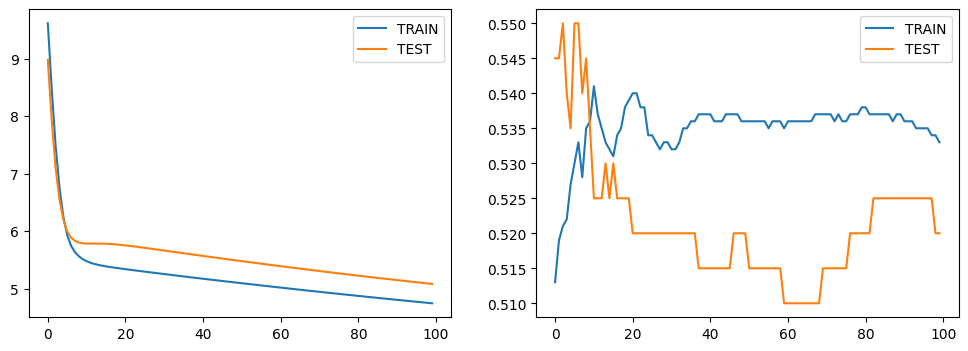

In [13]:
W, b = artificial_neuron(X_train_reshape, y_train, X_test_reshape, y_test, learning_rate=0.01, n_iter=1000)

100%|██████████| 10000/10000 [00:20<00:00, 495.02it/s]


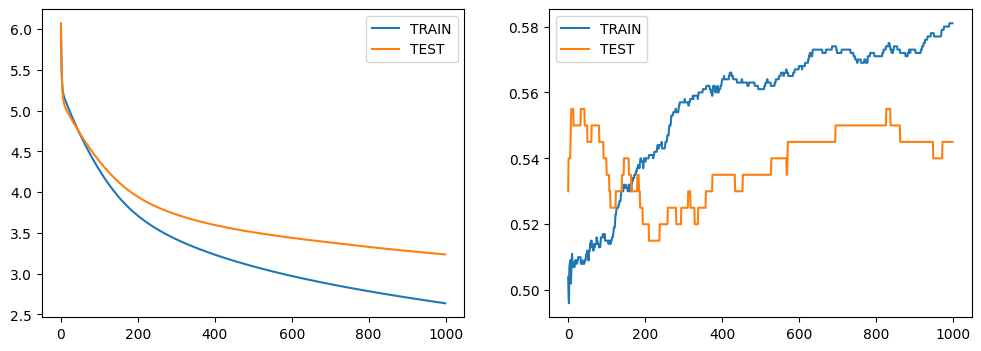

In [14]:
# on veut la performance maintenant. le modele iteratif a été modifier pour renvoyer le'accuracy de chaque epoch
# on calcule le locc et la ACC chaque 10 iterations
W, b = artificial_neuron(X_train_reshape, y_train, X_test_reshape, y_test, learning_rate=0.01, n_iter=10000)

### Fournir plus de données a nos machine, en effet 1000 photos ce n'est pas reduire le nombre de variable
### Utiliser une technique de regularization telque la penalité l1 ou l2

de plus, nous avons un grand decalage entre le nombre d'observation (photo) et le nombre de variable ==> probleme de fleau de demension qui fait que l'espace entre nos obseravtion est remplit de vide au sein duquel le modele peut se balader librement et trouver la configuration qu'il arrange personnelement pour obtenir un bon score sur le train set au detriment de son score sur le test set

Rappelons-nous, que ce modele est selement un neurone. et un neurone c'est un modele lineaire, ca veux dire trop simple pour etre utiliser dans les vrais probleme de la vie telle que celui ci qu'on ne peux pas separer lineairement.


### Rajouter donc d'autre neurone artificiel et faire un reseau de neurone

### Réseau de neurones à deux couches

dimensions de X: (100, 2)
dimensions de y: (100, 1)


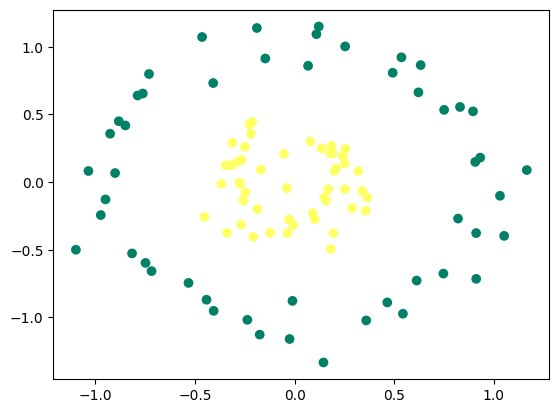

In [3]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
#X = X.T
y = y.reshape((y.shape[0], 1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer')
plt.show()

100%|██████████| 10000/10000 [00:05<00:00, 1962.48it/s]


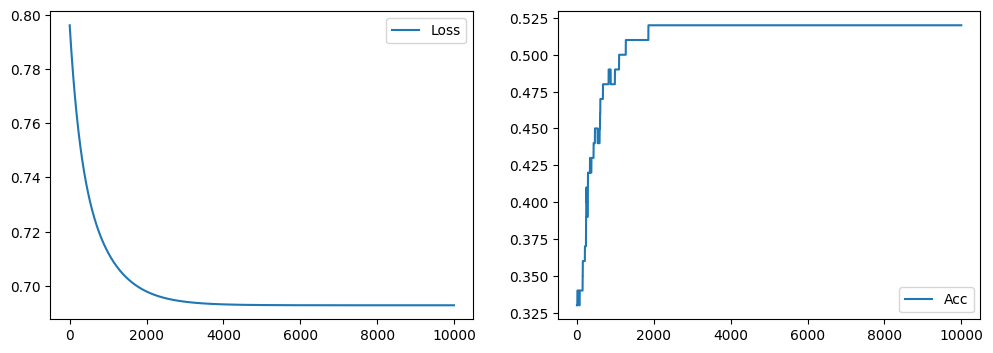

In [6]:
w, b = artificial_neuron_v1(X, y, learning_rate=0.01, n_iter=10000)

dimensions de X: (2, 100)
dimensions de y: (1, 100)


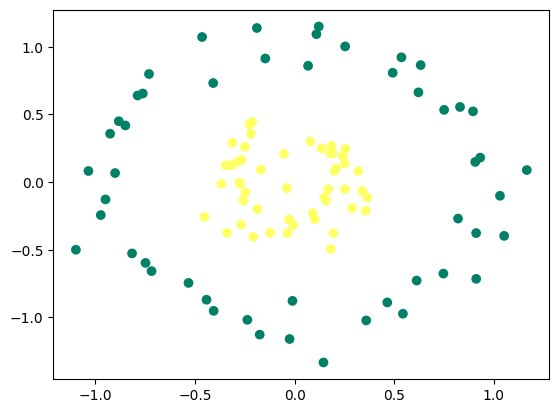

In [8]:
# il va faloire transposer nos données pour pouvoir les utilisées dans un reseau de neurones
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

100%|██████████| 10000/10000 [00:14<00:00, 712.49it/s]


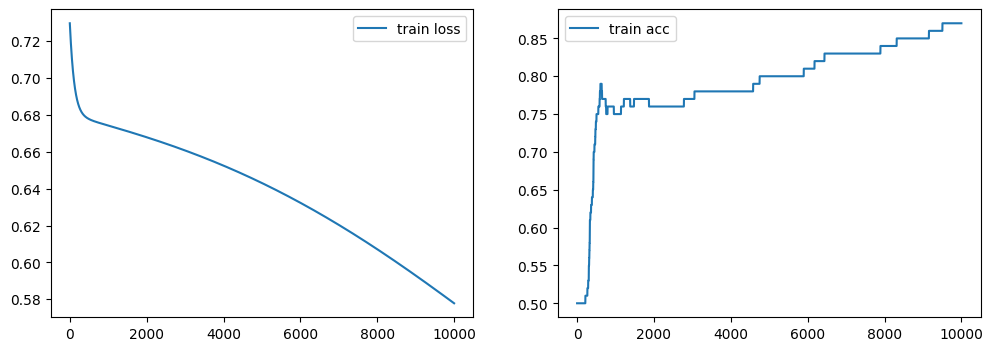

In [10]:
parametres = neural_network(X, y, n1=2, learning_rate = 0.01, n_iter = 10000)

### Cat VS Dog

In [16]:
# on redimensionne les données
y_train = y_train.T
y_test = y_test.T

X_train = X_train.T
X_train_reshape = X_train.reshape(-1, X_train.shape[-1]) / X_train.max()

X_test = X_test.T
X_test_reshape = X_test.reshape(-1, X_test.shape[-1]) / X_train.max()

m_train = 300
m_test = 80
X_test_reshape = X_test_reshape[:, :m_test]
X_train_reshape = X_train_reshape[:, :m_train]
y_train = y_train[:, :m_train]
y_test = y_test[:, :m_test]

print(X_train_reshape.shape)
print(X_test_reshape.shape)
print(y_train.shape)
print(y_test.shape)





(4096, 300)
(4096, 80)
(1, 300)
(1, 80)


In [19]:
X.shape

(2, 100)

100%|██████████| 8000/8000 [03:40<00:00, 36.25it/s]


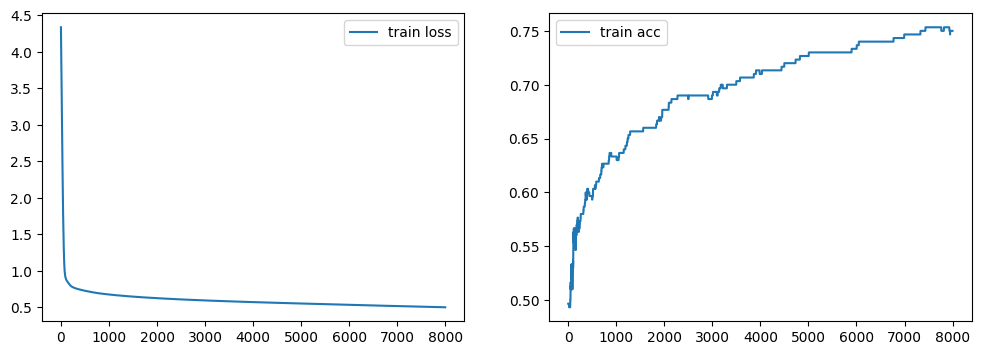

In [20]:
params1 = neural_network(
    X_train_reshape, y_train, n1=32, learning_rate = 0.01, n_iter = 8000)